# (Kaggle) Titanic: Machine Learning from Disaster Chap3

## 시작하기 전에

* 타이타닉 해상사고 데이터 분석을 진행하기 앞서 사용했던 파이썬 패키지 정리
    1. pip install numpy
    2. pip install scipy
    3. pip install pandas
    4. pip install scikit-learn
    5. pip install matplotlib
    6. pip install seaborn
    7. pip install jupyter

## 데이터 로드

In [31]:
# pandas 패키지를 사용
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# 트리 시각화 모듈(graphviz)정의
import graphviz
# scikit-learn모듈에서 Decision Tree를 시각화 할 수 있는 export_graphviz를 불러옴
from sklearn.tree import export_graphviz

# 머신러닝을 사용하기 위한 패키지 import
# DecisionTree를 사용하기 불러옴
from sklearn.tree import DecisionTreeClassifier

%matplotlib inline

# 블로그 업데이트용 jupyter notebook 크기 수정하는 부분(선택사항)
from IPython.core.display import display, HTML
display(HTML("<style>.container { width: 97% !important; }</style>"))

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
# 수정한 데이터 불러오기
train = pd.read_csv("data/train_modify.csv", index_col="PassengerId")
test = pd.read_csv("data/test_modify.csv", index_col="PassengerId")

In [3]:
# 불러온 데이터 확인(train)
print(train.shape)
train.head(10)

(891, 14)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,FamilyType,Title
PassengerId,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,Nuclear,Mr
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,Nuclear,Mrs
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Single,Miss
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,Nuclear,Mrs
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,Single,Mr
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,1,Single,Mr
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1,Single,Mr
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,5,Big,Master
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,3,Nuclear,Mrs


In [4]:
# 불러온 데이터 확인(test)
print(test.shape)
test.head(10)

(418, 13)


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,FamilyType,Title
PassengerId,,,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1,Single,Mr
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2,Nuclear,Mrs
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1,Single,Mr
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1,Single,Mr
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,3,Nuclear,Mrs
897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,1,Single,Mr
898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,1,Single,Miss
899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S,3,Nuclear,Mr
900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C,1,Single,Mrs


## 데이터 전처리(Preprocessing)

분석 이후 머신러닝을 이용하여 생존자를 예측해보기 앞서, 머신러닝 알고리즘이 적용될 수 있는 형태로 데이터를 가공해야 합니다.(데이터 전처리)
특히 이번에 사용하게 될 **Decision Tree**에 적용하려면 필요한 조건은 크게 두가지 입니다.

1. 적용할 데이터들은 수치형(정수, 실수형)으로 구성되어 있어야 한다.
2. 각 컬럼별 데이터들은 비어있으면 안된다.

따라서 적용할 데이터들을 수치화하거나, 비어있는 데이터들을 채워주는 작업을 진행해보겠습니다.

### Sex(성별) 데이터 Encoding

앞서 분석했던 ```Sex```데이터는 **male**, **female**등으로 구성되어 있습니다. 데이터 타입 또한 수치형이 아닙니다. 따라서 해당 데이터들을 머신러닝 알고리즘에 적용시키기 위해 수치 데이터로 재정의 해주어야 합니다(**Encoding**). 따라서 아래와 같이 수정하겠습니다.

* Male : 0, Female : 1

In [5]:
# Sex데이터를 바탕으로 Sex_encode라는 컬럼 추가
train.loc[train["Sex"] == "male", "Sex_encode"] = 0
train.loc[train["Sex"] == "female", "Sex_encode"] = 1

# 결과 확인
print(train.shape)

# train 데이터에서 Sex 컬럼과 Sex_encode 컬럼에 대한 상위 5개의 데이터 직접 확인
train[["Sex", "Sex_encode"]].head()

(891, 15)


,Sex,Sex_encode
PassengerId,,
1,male,0.0
2,female,1.0
3,female,1.0
4,female,1.0
5,male,0.0


In [6]:
# test 데이터도 마찬가지 방법으로 진행해 봅니다.
test.loc[test["Sex"] == "male", "Sex_encode"] = 0
test.loc[test["Sex"] == "female", "Sex_encode"] = 1

# 결과 확인
print(test.shape)

# train 데이터에서 Sex 컬럼과 Sex_encode 컬럼에 대한 상위 5개의 데이터 직접 확인
test[["Sex", "Sex_encode"]].head()

(418, 14)


,Sex,Sex_encode
PassengerId,,
892,male,0.0
893,female,1.0
894,male,0.0
895,male,0.0
896,female,1.0


### 빠진 데이터 채우기(Fill in missing data)

머신러닝 알고리즘에 적용시키기 위해서는 누락된(Nan, null)데이터가 존재해선 안됩니다. 따라서 누락된 데이터가 있는지 확인해 보겠습니다.

In [7]:
len(train[train["Survived"].isnull()])

0

In [8]:
# 어떤 컬럼의 데이터들이 누락된 데이터를 가지고 있는지 판단하는 함수를 정의
def is_null_data(data):
    isnull_dict = {}
    for column in data.columns:
        if len(data[data[str(column)].isnull()]) != 0:
            isnull_dict[str(column)] = True
        else:
            isnull_dict[str(column)] = False
    
    return isnull_dict

# 누락된 데이터 확인
print(is_null_data(train))
print("\n")
print(is_null_data(test))

{'Survived': False, 'Pclass': False, 'Name': False, 'Sex': False, 'Age': True, 'SibSp': False, 'Parch': False, 'Ticket': False, 'Fare': False, 'Cabin': True, 'Embarked': True, 'FamilySize': False, 'FamilyType': False, 'Title': False, 'Sex_encode': False}


{'Pclass': False, 'Name': False, 'Sex': False, 'Age': True, 'SibSp': False, 'Parch': False, 'Ticket': False, 'Fare': True, 'Cabin': True, 'Embarked': False, 'FamilySize': False, 'FamilyType': False, 'Title': False, 'Sex_encode': False}


사용할 컬럼을 기준으로 분석 결과, **train**에선 ```Embarked```컬럼과 ```Age```컬럼 데이터가 일부 비어 있는 것으로 확인 되었고 **test**에선 ```Age```컬럼과 ```Fare```컬럼이 비어 있는 것으로 확인되었습니다. 비범주형 데이터인 ```Age```와 ```Fare```데이터만 먼저 채워 보겠습니다. ```Embarked```데이터는 범주형 데이터이기에 실제 Encoding작업에서 비어있는 데이터가 자동으로 처리가 됩니다(**One-Hot Encoding** 참고)

#### Age 데이터 결측치 처리

앞선 분석결과에 의하면, Age데이터와 생존여부의 관계는 다음과 같이 정리할 수 있었습니다.

* 나이가 15세 이하인 어린이 및 청소년이며 운임요금을 20달러 이하로 지불한 승객일 수록 생존률이 상대적으로 높다.
* 즉, 보호자를 포함한 서민들 중에선 미성년자들의 생존률이 높다.

In [9]:
print("train데이터의 Age결측 갯수: ", len(train[train["Age"].isnull()]), "test데이터의 Age결측 갯수: ", len(test[test["Age"].isnull()]))

train데이터의 Age결측 갯수:  177 test데이터의 Age결측 갯수:  86


물론 위와 같이 실제 Age결측 데이터는 어떻게 처리하느냐에 따라 확률이 올라갈 수도 내려 갈 수도 있을 만큼 적지 않은 개수가 있습니다. 

따라서 비어 있는 값을 0이나 채워서 올바르게 처리해 주어야 하지만 앞선 분석(Part 1)에서 확인했다시피, 0이나 평균값으로 결측치를 채웠을 때 오히려 확률이 떨어졌던 것을 알 수 있었습니다. 

한편으로 호칭을 고려해서 나이를 채우려고 해도 호칭이 어느 특정 연령 범위에 걸쳐있지 않기 때문에(미혼이면 아이, 어른 상관 없이 Master, Miss) 결측치를 채우지 않은 상태에서 15세 이하와 16세 이상의 연령만을 고려한 새로운 ```Age```데이터 컬럼을 생성합니다.

In [10]:
# 데이터 분석 결과를 참고한 새로운 Age컬럼 생성
train["is_Child"] = train["Age"] <= 15

print(train.shape)
train.head(10)

(891, 16)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,FamilyType,Title,Sex_encode,is_Child
PassengerId,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,Nuclear,Mr,0.0,False
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,Nuclear,Mrs,1.0,False
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Single,Miss,1.0,False
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,Nuclear,Mrs,1.0,False
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,Single,Mr,0.0,False
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,1,Single,Mr,0.0,False
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1,Single,Mr,0.0,False
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,5,Big,Master,0.0,True
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,3,Nuclear,Mrs,1.0,False


In [11]:
# 같은 방식으로 test 데이터에도 is_Child컬럼을 생성해줍니다.
test["is_Child"] = test["Age"] <= 15

print(test.shape)
test.head(10)

(418, 15)


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,FamilyType,Title,Sex_encode,is_Child
PassengerId,,,,,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1,Single,Mr,0.0,False
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2,Nuclear,Mrs,1.0,False
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1,Single,Mr,0.0,False
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1,Single,Mr,0.0,False
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,3,Nuclear,Mrs,1.0,False
897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,1,Single,Mr,0.0,True
898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,1,Single,Miss,1.0,False
899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S,3,Nuclear,Mr,0.0,False
900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C,1,Single,Mrs,1.0,False


#### Fare 데이터 결측치 처리

다음으로 test 데이터에 있는 ```Fare```컬럼의 결측치를 처리해보겠습니다. 결측치가 많지 않아 그냥 평균값으로 처리합니다.

In [12]:
test[test["Fare"].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,FamilyType,Title,Sex_encode,is_Child
PassengerId,,,,,,,,,,,,,,,
1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,1,Single,Mr,0.0,False


In [13]:
# test데이터의 Fare 평균값
test["Fare"].mean()

35.627188489208635

In [14]:
# 결측치를 처리한 새로운 컬럼인 Fare_fill을 생성합니다
# train 데이터는 결측치가 없었지만, feature이름의 일관성을 위해 똑같이 생성해 줍니다.
train["Fare_fill"] = train["Fare"]
test["Fare_fill"] = test["Fare"]

# test 데이터의 Fare 결측치 처리
test.loc[test["Fare"].isnull(), "Fare_fill"] = test["Fare"].mean()
# 처리된 결과를 확인합니다
test.loc[test["Fare"].isnull(), ["Fare", "Fare_fill"]]

,Fare,Fare_fill
PassengerId,,
1044,NaN,35.627188


### Embarked(선착장) 데이터 전처리

```Embarked```데이터도 문자열화 되어있기 때문에 수치화 하겠습니다.

* C == 0
* S == 1
* Q == 2

이렇게 수치화 할 수 있는데 Decision Tree는 수치 연산에 의해서도 tree 가지를 생성하기 때문에 아래와 같은 오해가 생길 수 있습니다.
> S가 1이고 Q가 2라면 2*S = Q인가 ? 또는 S + S = Q인가 ?

따라서 위와 같은 오해가 생기지 않으려면 **수치 데이터**이면서 **연산 과정**이 수반되더라도 본래 의미를 변경시켜서는 안됩니다. 따라서 일반 수치 데이터가 아닌 논리적 수치데이터(**True**, **False**)로 치환해 봅니다.

* C == [True, False, False]
* S == [False, True, False]
* C == [False, False, True]

위와 같은 처리를 **원-핫 인코딩(One-Hot Encoding)**이라고 합니다.

In [15]:
# train 데이터 원-핫 인코딩
train["Embarked_C"] = train["Embarked"] == 'C'
train["Embarked_S"] = train["Embarked"] == 'S'
train["Embarked_Q"] = train["Embarked"] == 'Q'

print(train.shape)
train.head()

(891, 20)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,FamilyType,Title,Sex_encode,is_Child,Fare_fill,Embarked_C,Embarked_S,Embarked_Q
PassengerId,,,,,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,Nuclear,Mr,0.0,False,7.2500,False,True,False
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,Nuclear,Mrs,1.0,False,71.2833,True,False,False
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Single,Miss,1.0,False,7.9250,False,True,False
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,Nuclear,Mrs,1.0,False,53.1000,False,True,False
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,Single,Mr,0.0,False,8.0500,False,True,False


In [16]:
# test 데이터 원-핫 인코딩
test["Embarked_C"] = test["Embarked"] == 'C'
test["Embarked_S"] = test["Embarked"] == 'S'
test["Embarked_Q"] = test["Embarked"] == 'Q'

print(test.shape)
test.head()

(418, 19)


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,FamilyType,Title,Sex_encode,is_Child,Fare_fill,Embarked_C,Embarked_S,Embarked_Q
PassengerId,,,,,,,,,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1,Single,Mr,0.0,False,7.8292,False,False,True
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2,Nuclear,Mrs,1.0,False,7.0000,False,True,False
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1,Single,Mr,0.0,False,9.6875,False,False,True
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1,Single,Mr,0.0,False,8.6625,False,True,False
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,3,Nuclear,Mrs,1.0,False,12.2875,False,True,False


### FamilyType 전처리

이전 챕터에서 사전에 생성했던 ```FamilyType```또한 원-핫 인코딩 기법으로 전처리를 해 줍니다.

In [17]:
train[["FamilyType", "FamilySize"]].head()

,FamilyType,FamilySize
PassengerId,,
1,Nuclear,2
2,Nuclear,2
3,Single,1
4,Nuclear,2
5,Single,1


In [18]:
# train 데이터 원-핫 인코딩
train["Single"] = train["FamilyType"] == 'Single'
train["Nuclear"] = train["FamilyType"] == 'Nuclear'
train["Big"] = train["FamilyType"] == 'Big'

print(train.shape)
train[["FamilyType", "Single", "Nuclear", "Big"]].head()

(891, 23)


,FamilyType,Single,Nuclear,Big
PassengerId,,,,
1,Nuclear,False,True,False
2,Nuclear,False,True,False
3,Single,True,False,False
4,Nuclear,False,True,False
5,Single,True,False,False


In [19]:
# test 데이터 원-핫 인코딩
test["Single"] = test["FamilyType"] == 'Single'
test["Nuclear"] = test["FamilyType"] == 'Nuclear'
test["Big"] = test["FamilyType"] == 'Big'

print(test.shape)
test[["FamilyType", "Single", "Nuclear", "Big"]].head()

(418, 22)


,FamilyType,Single,Nuclear,Big
PassengerId,,,,
892,Single,True,False,False
893,Nuclear,False,True,False
894,Single,True,False,False
895,Single,True,False,False
896,Nuclear,False,True,False


### Name 데이터 전처리

마지막으로 ```Name```데이터 전처리를 진행해 보겠습니다. 이미 이전 챕터에서 ```Title```이라는 것을 생성해 냈는데, 여성과 ```Master```의 호칭을 가진 남자들은 과반 이상의 생존률을 보여주었습니다. 여성의 호칭이야 어찌 되었든지 이미 성별에서 생존의 여부가 결정이 되므로 Master의 호칭을 가진 남성에 대한 생존 판단 확률을 높이기 위해 ```Title```데이터를 이용하여 ```Master```인지 아닌지를 판단하는 새로운 데이터를 생성 합니다.

In [20]:
# train 데이터에 is_Master 컬럼 생성
train["is_Master"] = train["Title"] == "Master"

print(train.shape)
train[["is_Master", "Title"]].head(10)

(891, 24)


,is_Master,Title
PassengerId,,
1,False,Mr
2,False,Mrs
3,False,Miss
4,False,Mrs
5,False,Mr
6,False,Mr
7,False,Mr
8,True,Master
9,False,Mrs


In [21]:
# test 데이터에 is_Master 컬럼 생성
test["is_Master"] = test["Title"] == "Master"

print(test.shape)
test[["is_Master", "Title"]].head(10)

(418, 23)


,is_Master,Title
PassengerId,,
892,False,Mr
893,False,Mrs
894,False,Mr
895,False,Mr
896,False,Mrs
897,False,Mr
898,False,Miss
899,False,Mr
900,False,Mrs


### ML Train 데이터 생성

전처리 한 데이터를 본격적으로 사용할 머신러닝 알고리즘인 **Decision Tree**에 학습(Train)을 진행해 보겠습니다. Decision Tree는 지도학습(Supervised Learning)알고리즘 중 하나로 해당 알고리즘을 사용하기 위해서는 아래와 같은 타입의 데이터가 필요합니다

* **Label** : 레이블(Label), 내지는 타겟 변수(Target Variable)이라고 부릅니다. (몇몇 곳에서는 Class라고도 부릅니다) 쉽게 말해 **우리가 맞춰야 하는 정답**입니다. 이 문제에선 ```Survived```가 해당됩니다.
* **Feature** : **Label을 맞추는데 도움이 되는 값들**입니다.(전처리 한 데이터 대부분)

따라서 위 개념을 토대로 사용할 Feature와 Label을 정리하면 다음과 같습니다.

* **Feature** : ```Pclass```, ```Sex_encode```, ```Fare_fill```, ```Embarked```, ```is_Child```, ```is_Master```, ```Single```, ```Big```, ```Nuclear```
* **Label** : ```Survived```

위를 바탕으로 train 데이터와 test 데이터를 다음의 세 가지 형태의 값으로 정의합니다.

* **X_train**: train 데이터의 feature 입니다. 줄여서 **X_train**이라고 부릅니다.
* **X_test**: test 데이터의 feature 입니다. 마찬가지로 줄여서 **X_test**라고 부릅니다.
* **Y_train**: train 데이터의 label 입니다. **y_train**이라고 부릅니다.

**y_test**는 따로 명시되어 있지 않은데, 구하고자 하는 정답(예측)이 **y_test**에 해당한다고 보면 됩니다. **Decision Tree**를 이용하여 **y_test**를 구한다고 보면 됩니다.

In [22]:
# feature들에 해당하는 명칭을 리스트에 저장합니다.
feature_names = ["Pclass", "Sex_encode", "Fare_fill", "Embarked_C", "Embarked_S", "Embarked_Q",
                 "is_Child", "is_Master", "Single", "Big", "Nuclear"]

feature_names

['Pclass',
 'Sex_encode',
 'Fare_fill',
 'Embarked_C',
 'Embarked_S',
 'Embarked_Q',
 'is_Child',
 'is_Master',
 'Single',
 'Big',
 'Nuclear']

In [23]:
# 생존 여부(Survived)를 label로 정의
label_name = "Survived"
label_name

'Survived'

In [24]:
# 학습을 시킬 feature 데이터만 추출합니다
X_train = train[feature_names]

print(X_train.shape)
X_train.head()

(891, 11)


,Pclass,Sex_encode,Fare_fill,Embarked_C,Embarked_S,Embarked_Q,is_Child,is_Master,Single,Big,Nuclear
PassengerId,,,,,,,,,,,
1,3,0.0,7.2500,False,True,False,False,False,False,False,True
2,1,1.0,71.2833,True,False,False,False,False,False,False,True
3,3,1.0,7.9250,False,True,False,False,False,True,False,False
4,1,1.0,53.1000,False,True,False,False,False,False,False,True
5,3,0.0,8.0500,False,True,False,False,False,True,False,False


In [25]:
# test 데이터도 같은 방식으로 진행합니다.
X_test = test[feature_names]

print(X_test.shape)

X_test.head()

(418, 11)


,Pclass,Sex_encode,Fare_fill,Embarked_C,Embarked_S,Embarked_Q,is_Child,is_Master,Single,Big,Nuclear
PassengerId,,,,,,,,,,,
892,3,0.0,7.8292,False,False,True,False,False,True,False,False
893,3,1.0,7.0000,False,True,False,False,False,False,False,True
894,2,0.0,9.6875,False,False,True,False,False,True,False,False
895,3,0.0,8.6625,False,True,False,False,False,True,False,False
896,3,1.0,12.2875,False,True,False,False,False,False,False,True


In [26]:
# y_train 생성
y_train = train[label_name]

print(y_train.shape)
y_train.head()

(891,)


PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64

### Decision Tree 사용

머신러닝 알고리즘을 사용하기 위한 패키지로 ```scikit-learn```을 사용합니다. 크게 두가지 기능이 있습니다.

* **fit**: 머신러닝 알고리즘을 학습시킴. fit을 하기 위해서는 train 데이터가 필요하며, 정확히는 train 데이터의 feature(X_train)와 label(y_train)이 필요합니다.

* **predict**: fit이 끝나면 **predict**을 통해 예측을 할 수 있습니다. predict을 하기 위해선 test 데이터가 필요하며 test 데이터의 feature(X_test)가 필요합니다.

In [27]:
# 머신러닝 알고리즘에 의한 모델 생성
model = DecisionTreeClassifier(max_depth=8, random_state=0)
model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [29]:
# DecisionTreeClassifier를 학습(fitting)하는 부분.
# fit 함수에는 train 데이터의 feature(X_train)과 label(y_train)을 넣습니다.(지도학습)
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

### Visualize(DT 시각화)

Decision Tree의 학습이 완료되면, 시각화(visualize)하여 확인할 수 있습니다.

확인하기 위해선 graphviz 패키지가 설치 되어 있어야 합니다.(설치 방법은 구글 참조)

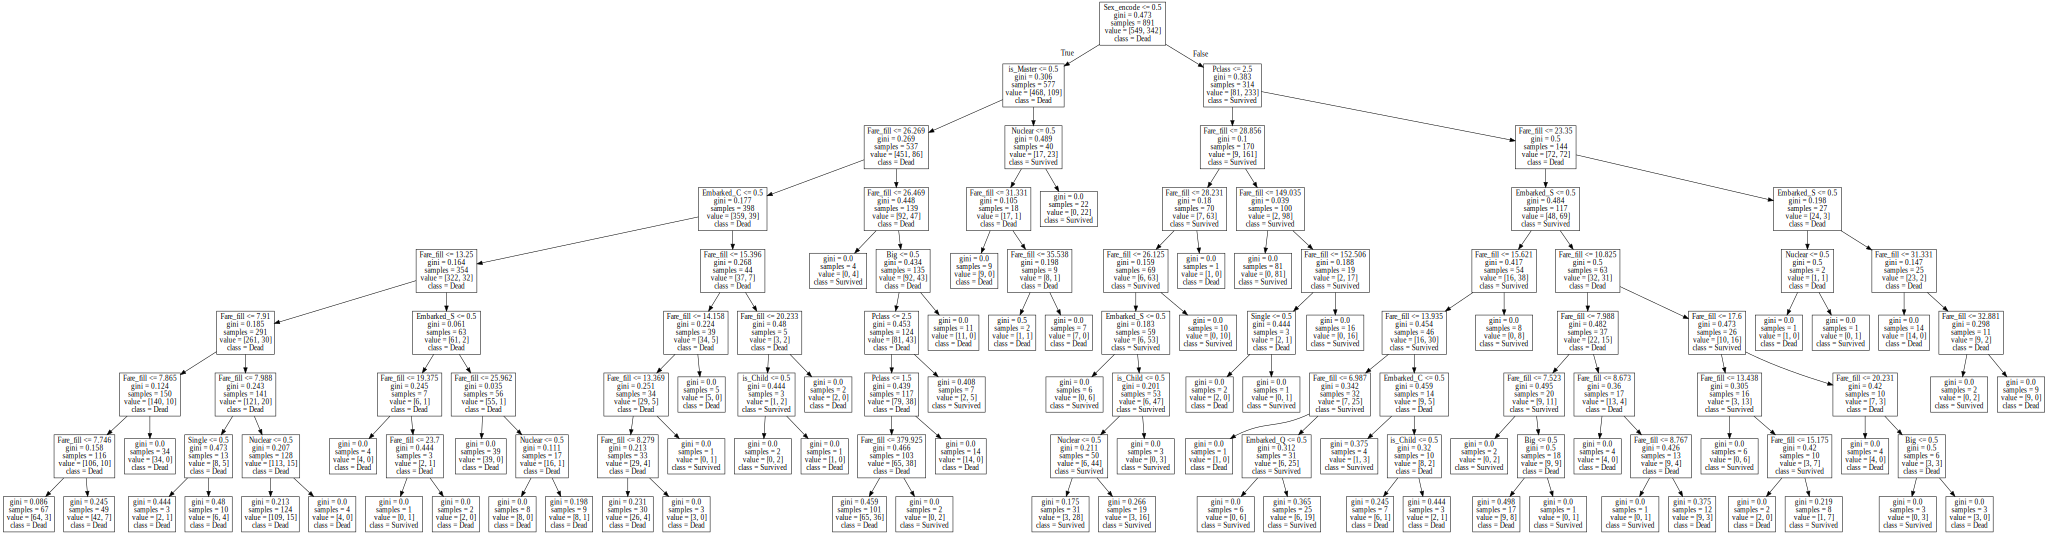

In [34]:
# 각각의 파라미터는 다음과 같습니다
# 1) model : 시각화를 진행할 DecisionTree 모델입니다.
# 2) feature_names : 트리를 사용할 때 만든 feature_names 입니다.
# 3) class_names : 살았을 경우 시각화에서 어떻게 표현할 것인지(Survived), 반대로 죽었을 경우 시각화에서 어떻게 표현할 것인지 설정해 주는 부분입니다.
# 4) out_file : 시각화 결과를 저장할 파일명입니다(저장하지 않을 시 None으로 설정해 줍니다(기본값))
dot_tree = export_graphviz(model,
                           feature_names=feature_names,
                           class_names=["Dead", "Survived"],
                           out_file=None)

# graphviz에 Source 메소드로 시각화 진행
graphviz.Source(dot_tree)

### Predict

Decision Tree가 성공적으로 학습이 되었다면, 남은 것은 이 Decision Tree를 활용해 테스트 데이터에 있는 승객의 생존/사망 여부를 예측하는 것입니다. 예측은 ```model.predict```로 할 수 있으며, 이 때 test 데이터의 feature인 X_test가 필요합니다.

In [36]:
# predictions 객체에 예측한 결과를 저장합니다
predictions = model.predict(X_test)

# 결과 확인
print(X_test.shape)
predictions[:20]

(418, 11)


array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1],
      dtype=int64)

### Submit

나온 결과(**prediction**)를 케글([Kaggle](www.kaggle.com))에 제출합니다. 제출하기 앞서 권장 포멧으로 주어진 파일에 맞춰 제출하도록 하겠습니다.

In [37]:
# 권장 포멧 파일 불러오기
submission = pd.read_csv("data/gender_submission.csv", index_col="PassengerId")

# submission 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
print(submission.shape)
submission.head()

(418, 1)


,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1


In [38]:
# 해당 포멧에 만든 예측값을 대입합니다
submission["Survived"] = predictions

print(submission.shape)
submission.head()

(418, 1)


,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1


In [39]:
# 포멧에 맞춘 값을 다시 파일로(csv)저장합니다
submission.to_csv("data/DT_prediction.csv")

* 최종 스코어 : **0.81339**

In [40]:
# 추가적으로 여기서 사용한 train 데이터와 test 데이터를 백업합니다(머신러닝 재적용 용이하게 하기 위함)
train.to_csv("data/train_modify_final.csv")
test.to_csv("data/test_modify_final.csv")

### 출처

* Jupter notebook 블로그 paste 관련 전처리 :  https://versusall.tistory.com/entry/1-Tensor-Flow-%EC%8B%9C%EC%9E%91%ED%95%98%EA%B8%B0-Core-Tutorial?category=749169
* seaborn 데이터 시각화에 대한 정리 글 : https://brunch.co.kr/@jjason68/12
* seaborn 데이터 시각화에 대한 정리 글2 : https://pinkwink.kr/984
* DSSchool 기초과정에서 배운 내용을 토대로 재구성 및 복습